In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from sklearn.dummy import DummyClassifier
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

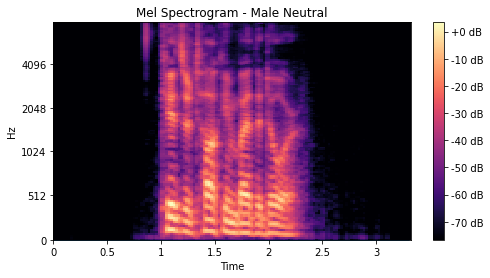

In [3]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB')

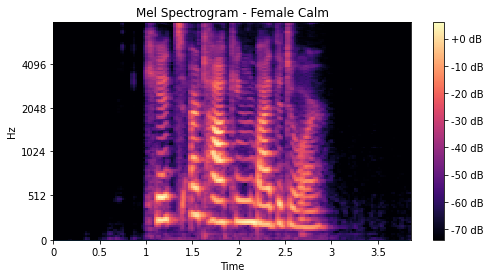

In [4]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB')

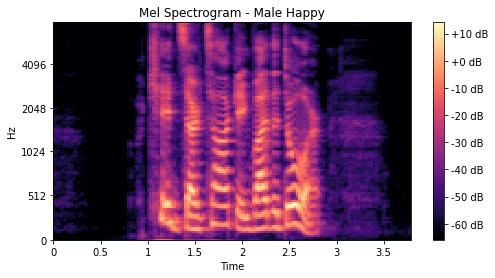

In [5]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_03/03-01-03-01-01-01-03.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)
librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB')

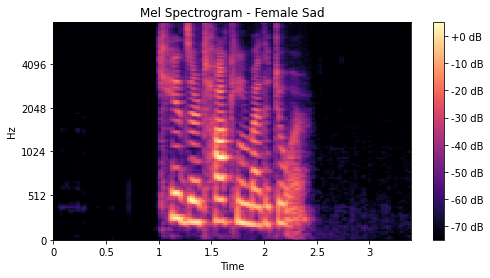

In [6]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_04/03-01-04-01-01-01-04.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Sad')
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB')

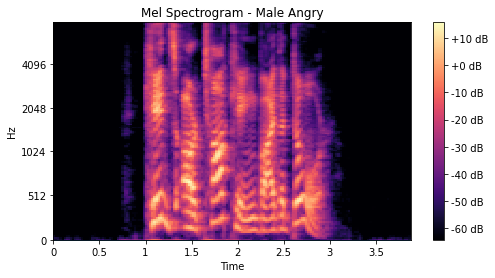

In [7]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_05/03-01-05-01-01-01-05.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Angry')
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB')

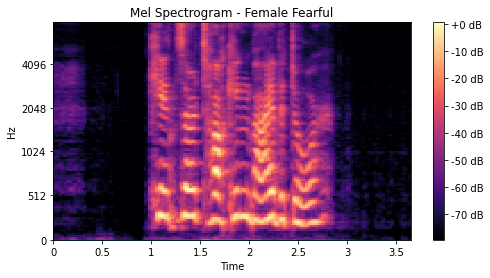

In [8]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_06/03-01-06-01-01-01-06.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB')

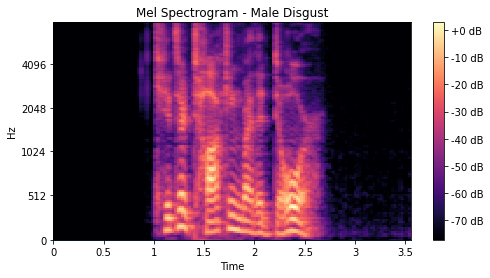

In [9]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_07/03-01-07-01-01-01-07.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB')

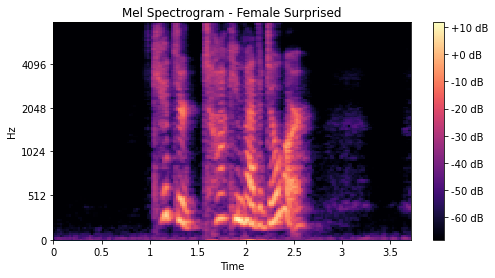

In [10]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_08/03-01-08-01-01-01-08.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB')

In [11]:
audio = "/content/drive/MyDrive/Audio_Speech_Actors_01-24/"
actor_folders = os.listdir(audio)
actor_folders.sort() 
actor_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [12]:
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i)
    for f in filename:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg % 2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'pos', 2:'pos', 3:'pos', 4:'neg', 5:'neg', 6:'neg', 7:'neg', 8:'pos'})#({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,pos,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1,male,pos,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
2,male,pos,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
3,male,pos,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
4,male,pos,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
...,...,...,...,...
1435,female,neg,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1436,female,pos,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1437,female,pos,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1438,female,pos,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...


In [13]:
pd.set_option('display.max_colwidth', -1)
audio_df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,gender,emotion,actor,path
10,male,neg,1,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_01/03-01-04-02-01-01-01.wav
230,female,neg,4,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_04/03-01-07-02-01-02-04.wav
1234,male,neg,21,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_21/03-01-06-01-02-01-21.wav
1274,female,pos,22,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-02-01-01-02-22.wav
992,male,neg,17,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_17/03-01-05-01-02-02-17.wav
956,female,pos,16,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_16/03-01-08-01-01-01-16.wav
917,female,pos,16,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_16/03-01-03-01-02-02-16.wav
223,female,neg,4,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_04/03-01-05-02-02-02-04.wav
777,male,pos,13,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_13/03-01-08-01-01-02-13.wav
1288,female,pos,22,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-03-02-02-01-22.wav


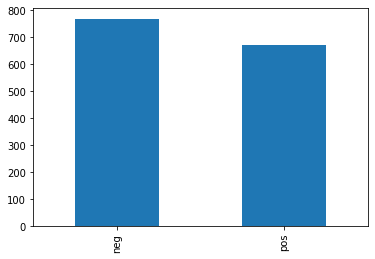

In [14]:
audio_df.emotion.value_counts().plot(kind='bar')

In [15]:
df = pd.DataFrame(columns=['mel_spectrogram'])
for index, path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    log_spectrogram = np.mean(db_spec, axis = 0)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfcc = np.mean(mfcc,axis=0)
    df.loc[index] = [log_spectrogram]
print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-79.61142, -79.61142, -79.61142, -79.61142, -79.61142, -79.61142, -79.61142, -79.61037, -79.61142, -79.5505, -79.3984, -79.58202, -79.61142, -79.61142, -79.6029, -79.60936, -79.61142, -79.6101, -79.575806, -79.36379, -79.24537, -79.572586, -79.61142, -79.10489, -78.0653, -78.34661, -79.32881, -79.61142, -79.3803, -76.99489, -69.49426, -67.420494, -71.69285, -77.55179, -78.59408, -77.33197, -76.80479, -75.728836, -73.6734, -73.63851, -73.79517, -73.320366, -53.179367, -41.105118, -39.716854, -37.36446, -34.027317, -32.77425, -31.815086, -31.81043, -31.427832, -31.59653, -32.039608, -31.864943, -32.456676, -33.20365, -33.501263, -33.637108, -34.00089, -34.49173, -34.897243, -35.60857, -37.031387, -38.84752, -38.970398, -39.801884, -42.110844, -44.887142, -48.34272, -52.338825, -54.5935, -55.26956, -48.771236, -45.475616, -46.225468, -46.426723, -46.939034, -44.739998, -42.745537, -40.823933, -37.87938, -37.480846, -38.51911, -39.358578, -39.506084, -39.92851, -40.663425, -41.11452, -40.952694, -40.562237, -40.20431, -41.16925, -42.07095, -43.064137, -43.627422, -42.979515, -41.427296, -40.834106, -42.271984, -38.925453, ...]"
1,"[-76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.367455, -76.37206, -76.38477, -76.38477, -76.17391, -75.7191, -75.94153, -75.64262, -75.90894, -75.83096, -75.7507, -74.77977, -72.83129, -71.26305, -66.522675, -66.2235, -70.02048, -72.228935, -72.31369, -73.103096, -73.700745, -74.24736, -72.63008, -70.08872, -71.00686, -71.960075, -64.49295, -45.909077, -40.032604, -41.116264, -43.53601, -40.618973, -35.053967, -32.517483, -32.09255, -32.517563, -33.537037, -33.267624, -35.378643, -40.17928, -42.373196, -43.332584, -42.339584, -40.89039, -37.12334, -35.466946, -33.28547, -32.946716, -32.992203, -33.490017, -35.94524, -41.89631, -47.815334, -50.32318, -45.502876, -38.28941, -38.666992, -41.103245, -41.816746, -42.41458, -41.487278, -39.022465, -35.519356, -33.715797, -33.540745, -34.01699, -34.09233, -32.436264, -31.850286, -33.650314, -38.19356, -42.97809, -45.402485, -45.206005, -44.586697, -45.93698, -45.795696, -40.709064, -37.872944, -38.022907, -38.164814, -39.510433, -41.684795, -42.941948, ...]"
2,"[-75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.13959, -75.07223, -75.15071, -75.15071, -75.15071, -75.15071, -75.09937, -75.15071, -75.15071, -75.15071, -75.10905, -75.09412, -75.15071, -74.92822, -74.1517, -74.19842, -74.51549, -75.11954, -75.10399, -75.13165, -75.15071, -75.15071, -75.14988, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.069016, -74.12102, -73.617714, -74.536026, -74.17392, -73.56244, -72.48515, -73.084854, -49.680855, -39.80159, -36.830807, -35.70478, -34.180237, -31.86353, -30.69315, -30.325382, -30.965012, -30.82406, -30.03375, -28.690538, -28.168774, -28.138542, -29.081398, -30.787271, -33.000286, -37.51421, -41.930313, -44.93863, -44.383247, -41.121105, -40.154667, -39.98905, -39.938183, -41.252926, -40.4535, -37.338863, -35.710594, -36.26966, -36.070953, -36.352516, -36.936497, -38.03057, -39.899944, -40.525482, -41.244236, -41.383785, -40.33425, -38.542667, -39.557934, -40.667435, -37.19942, -32.58196, -32.73895, -33.5526, -37.302288, -43.403584, -39.877724, -35.744804, -34.76521, -34.00362, -33.99902, -34.42435, -35.477673, -38.351665, -41.04027, ...]"
3,"[-76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.65121, -76.677536, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.80453, -76.5322, -76.44933, -76.64952, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.568886, -74.67807, -73.09236, -74.03147, -74.68943, -64.24568, -47.49774, -41.946453, -39.79607, -39.147137, -40.741, -42.

In [16]:
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)
df_combined.drop(columns='path',inplace=True)
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,pos,1,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.610367,-79.611420,-79.550499,-79.398399,-79.582024,-79.611420,-79.611420,-79.602898,-79.609360,-79.611420,-79.610100,-79.575806,-79.363792,-79.245369,-79.572586,-79.611420,-79.104889,-78.065300,-78.346611,-79.328812,-79.611420,-79.380302,-76.994888,-69.494263,-67.420494,-71.692848,-77.551788,-78.594078,-77.331970,-76.804787,...,-77.751556,-78.320374,-79.211922,-79.385170,-79.452354,-79.595520,-79.334435,-79.189003,-79.421410,-79.542503,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.424179,-79.310196,-79.611420,-79.555916,-79.548904,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.595421,-79.611420,-79.611420,-79.611420,-79.611420
1,male,pos,1,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.367455,-76.372063,-76.384773,-76.384773,-76.173912,-75.719101,-75.941528,-75.642616,-75.908943,-75.830963,-75.750702,-74.779770,-72.831291,-71.263046,-66.522675,-66.223503,-70.020477,-72.228935,-72.313690,-73.103096,-73.700745,...,-76.307678,-76.327888,-76.380356,-76.322456,-76.256866,-76.058685,-76.228973,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,pos,1,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.139587,-75.072227,-75.150711,-75.150711,-75.150711,-75.150711,-75.099373,-75.150711,-75.150711,-75.150711,-75.109047,-75.094116,-75.150711,-74.928223,-74.151703,-74.198418,-74.515488,-75.119537,-75.103989,-75.131653,-75.150711,-75.150711,-75.149879,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.069016,-74.121017,...,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.112236,-75.101410,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-74.863907,-74.294701,-74.354446,-74.683067,-74.923653,-74.444016,-74.158699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,pos,1,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.651207,-76.677536,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.804527,-76.532204,-76.449333,-76.649521,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,...,-75.776962,-76.708275,-76.758972,-76.822235,-76.635643,-75.804024,-75.791672,-76.233810,-76.709061,-76.738503,-76.742928,-76.783592,-76.828041,-76.799324,-76.765839,-76.828041,-76.828041,-76.828041,-76.799454,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.805473,-76.828041
4,male,pos,1,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.127945,-80.133469,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-79.741898,-79.204338,-79.975922,-80.147377,-80.118141,-80.035789,-79.775558,-79.230133,-80.020821

In [17]:
train,test = train_test_split(df_combined, test_size=0.2, random_state=0, stratify=df_combined[['emotion','gender','actor']])
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(1152, 259)
(288, 259)


In [18]:
from sklearn import tree


print(X_train.shape)
print(X_test.shape)
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

(1152, 259)
(288, 259)


0.5208333333333334

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.6319444444444444

In [20]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
print(lb.classes_)
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_train.shape

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
['neg' 'pos']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1152, 259, 1)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(layers.Conv1D(64, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(6)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(8),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(6)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(256, kernel_size=(5),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(1)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 252, 64)           576       
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 245, 128)          65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 245, 128)          512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 33, 128)           1

In [22]:
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history = model.fit(X_train, y_train,batch_size=64, epochs=180, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/180
18/18 [==============================] - 8s 338ms/step - loss: 1.8519 - accuracy: 0.5454 - val_loss: 1.5237 - val_accuracy: 0.5347

Epoch 00001: val_accuracy improved from -inf to 0.53472, saving model to best_initial_model.hdf5
Epoch 2/180
18/18 [==============================] - 5s 304ms/step - loss: 1.6355 - accuracy: 0.5847 - val_loss: 1.5669 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.53472
Epoch 3/180
18/18 [==============================] - 5s 305ms/step - loss: 1.6278 - accuracy: 0.5844 - val_loss: 1.5722 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.53472
Epoch 4/180
18/18 [==============================] - 5s 301ms/step - loss: 1.6464 - accuracy: 0.5634 - val_loss: 1.5660 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.53472
Epoch 5/180
18/18 [==============================] - 5s 304ms/step - loss: 1.4772 - accuracy: 0.6136 - val_loss: 1.4935 - val_accuracy: 0.5000

Epoch 00005: val_a

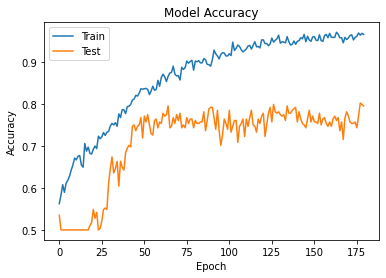

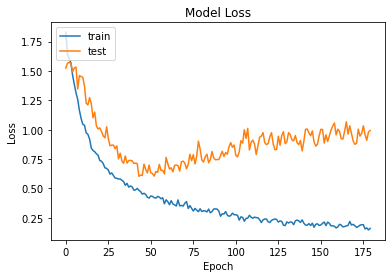

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [24]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 1s 33ms/step - loss: 0.9936 - accuracy: 0.7951
Loss of the model is -  0.9936169385910034
9/9 [==============================] - 0s 34ms/step - loss: 0.9936 - accuracy: 0.7951
Accuracy of the model is -  79.51388955116272 %


In [25]:
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

finaldf = actual.join(predictions)
finaldf[140:160]

,Actual Values,Predicted Values
140,neg,neg
141,neg,neg
142,neg,pos
143,pos,pos
144,neg,neg
145,pos,neg
146,pos,pos
147,pos,pos
148,neg,neg
149,pos,pos


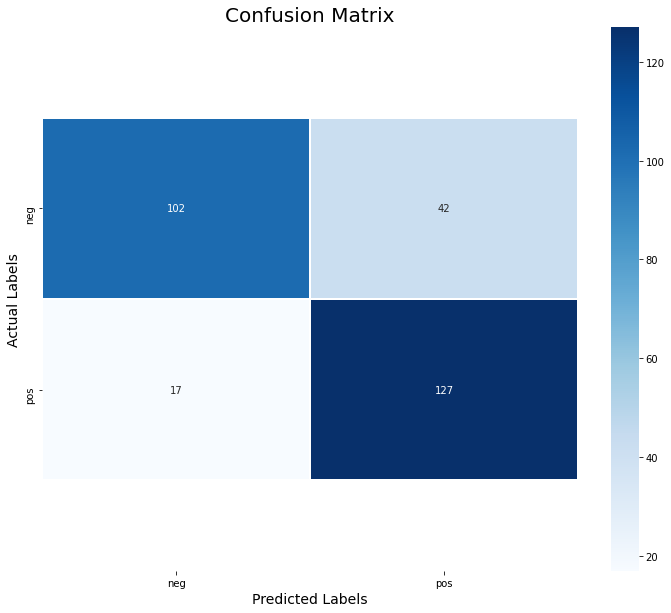

In [26]:
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
import os
import glob 
import random
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import IPython.display as ipd

import tensorflow as tf
from matplotlib.pyplot import specgram
from tensorflow import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

In [ ]:
prefix_path = '/content/drive/MyDrive/Audio_Speech_Actors_01-24/'
mylist = os.listdir(prefix_path)
mylist.sort()
print(mylist)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in mylist:
    file_list = os.listdir(prefix_path + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = prefix_path + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [ ]:
print(len(data_df))
data_df.head()

1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,1,0,2
1,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,0,1
2,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,1,0,1
3,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,1,2
4,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,0,2


In [ ]:
filename = data_df.path[1021]
print(filename)

samples, sample_rate = librosa.load(filename)
print(samples)

/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_18/03-01-01-01-01-02-18.wav
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
len(samples)

77989

In [ ]:
sample_rate

22050

In [ ]:
def log_specgram(audio, sample_rate, window_size = 20,
                step_size = 10, eps = 1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                           fs = sample_rate,
                                           window = 'hann',
                                           nperseg = nperseg,
                                           noverlap = noverlap,
                                           detrend = False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
sample_rate / len(samples)

0.28273218017925605

Text(0.5, 0, 'Seconds')

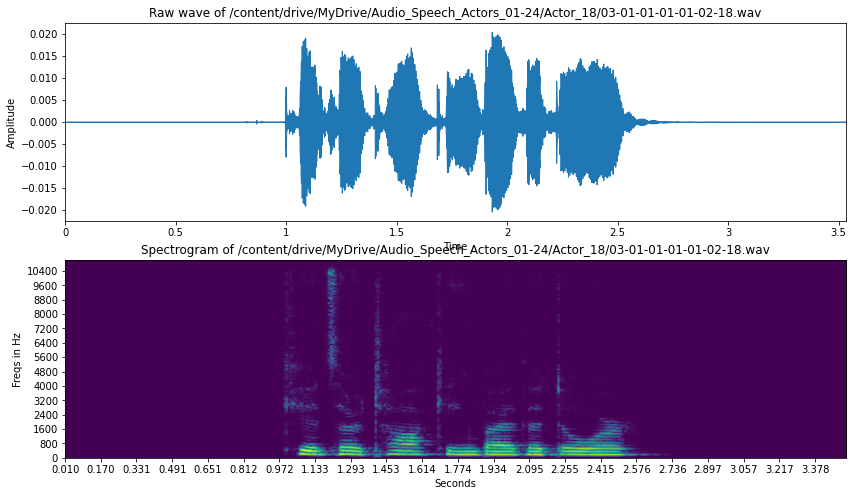

In [ ]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [ ]:
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-1.9141038e-07, -4.1607140e-07,  2.0688096e-06, ...,
         5.6699279e-05,  2.1195672e-05,  3.1794041e-06], dtype=float32),
 array([20992, 58880]))

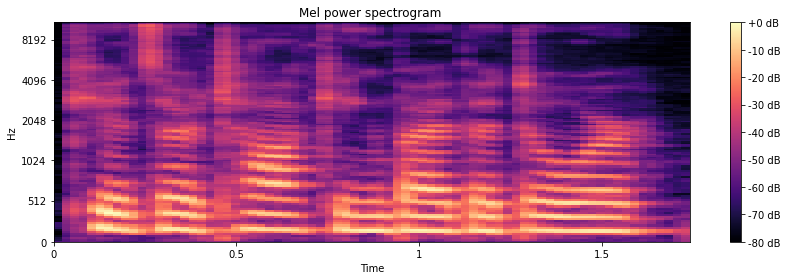

In [ ]:
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

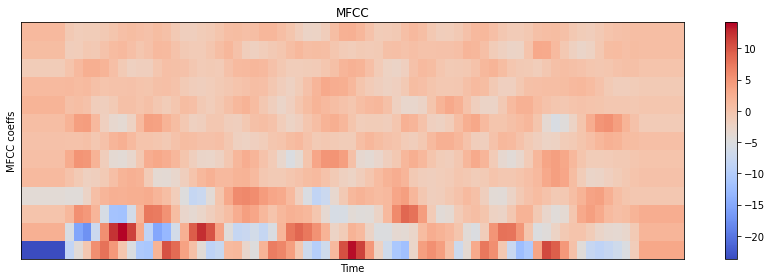

In [ ]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
ipd.Audio(samples, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [ ]:
#Silence trimmed Sound by manuel trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [ ]:
# 2 class: Positive & Negative

# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad

label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
        
    # Add gender to the label    
    label2_list.append(data_df.gender[i] + lb)
    
len(label2_list)

1440

In [ ]:
#3 class: Positive, Neutral & Negative

# Positive:  Happy
# Negative: Angry, Fearful, Sad
# Neutral: Calm, Neutral

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
    
    # Add gender to the label  
    label3_list.append(data_df.gender[i] + lb)
    
len(label3_list)

1440

In [ ]:
# 5 class: angry, calm, sad, happy & fearful
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1440

In [ ]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

In [ ]:
# Select the label set you want by commenting the unwanteds.

data_df['label'] = label2_list
# data_df['label'] = label3_list
# data_df['label'] = label5_list
#data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,1,0,2,male_positive
1,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,0,1,male_none
2,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,1,0,1,male_none
3,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,1,2,male_positive
4,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,0,2,male_positive


In [ ]:
print(data_df.label.value_counts().keys())

Index(['female_negative', 'male_negative', 'female_none', 'male_none',
       'male_positive', 'female_positive'],
      dtype='object')


In [ ]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

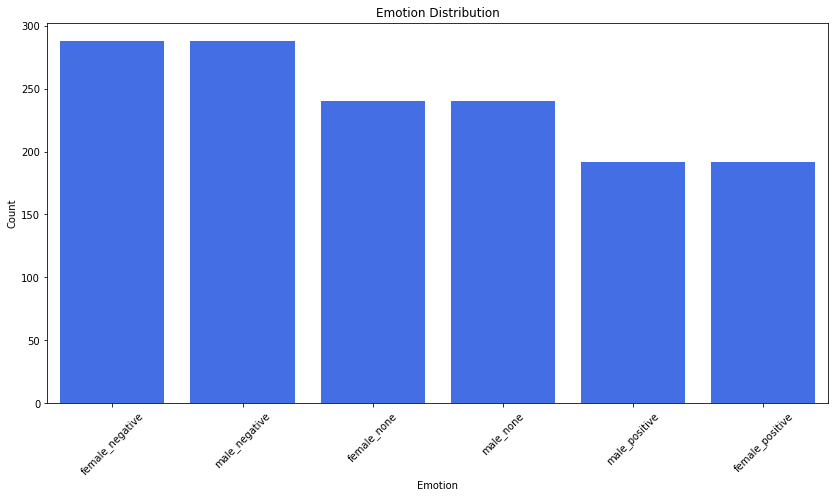

In [ ]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

In [ ]:
# Male Data Set

## Uncomment all below to use Male set 

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head()

760


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,1,0,2,male_calm
1,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,0,1,male_neutral
2,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,1,0,1,male_neutral
3,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,1,2,male_calm
4,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,1,male,0,0,0,2,male_calm


In [ ]:
print (len(data3_df))
data3_df.head()

120


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,21,male,0,1,0,1,male_neutral
1,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,21,male,0,0,0,2,male_calm
2,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,21,male,0,0,1,2,male_calm
3,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,21,male,0,0,1,1,male_neutral
4,/content/drive/MyDrive/Audio_Speech_Actors_01-...,1,21,male,0,0,0,1,male_neutral


In [ ]:
data = pd.DataFrame(columns=['feature'])
input_duration = 3 

for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

 90%|████████▉ | 1292/1440 [11:28<01:08,  2.17it/s]

In [ ]:
data.head()

In [ ]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data_df.label

In [ ]:
df3.head()

In [ ]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

In [ ]:
rnewdf.head(10)

In [ ]:
rnewdf.isnull().sum().sum()

In [ ]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

In [ ]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

In [ ]:
X, sample_rate = librosa.load(data_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

In [ ]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [ ]:
# Augmentation Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.label[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data_df.label[i]]

In [ ]:
# Augmentation Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.label[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data_df.label[i]]

In [ ]:
len(syn_data1), len(syn_data2)

In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [ ]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

In [ ]:
syndf1.head()

In [ ]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

In [ ]:
syndf2.head()

In [ ]:
# Combining the Augmented data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

In [ ]:
#  Stratified Shuffle Split

X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
X_train.isna().sum().sum()

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = utils.to_categorical(lb.fit_transform(y_train))
y_test = utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train

In [ ]:
X_train.shape

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Model Training
# model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1, steps_per_epoch=1)
checkpoint = ModelCheckpoint("best_rav_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)
history = model.fit(x_traincnn, y_train, batch_size=16, epochs=600, validation_data=(x_testcnn, y_test),callbacks=[checkpoint])

In [ ]:
# Plotting the Train Valid Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

In [ ]:
# Saving the model.json

import json
model_json = model.to_json()
with open("/content/drive/MyDrive/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
len(data3_df)

80

In [ ]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data3_df))):
    X, sample_rate = librosa.load(data3_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data3_df.label)
lb = LabelEncoder()
test_valid_lb = utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 80/80 [00:05<00:00, 14.53it/s]


In [ ]:
preds = model.predict(test_valid, 
                      batch_size=16, 
                      verbose=1)

5/5 [==============================] - 0s 4ms/step


In [ ]:
preds

array([[3.57274385e-03, 9.96427238e-01],
       [2.99389158e-09, 1.00000000e+00],
       [1.36179369e-05, 9.99986410e-01],
       [9.99901891e-01, 9.81525591e-05],
       [1.37254242e-02, 9.86274540e-01],
       [1.49798010e-15, 1.00000000e+00],
       [2.63528365e-14, 1.00000000e+00],
       [3.41629675e-05, 9.99965787e-01],
       [9.95453000e-01, 4.54703113e-03],
       [1.24935899e-03, 9.98750687e-01],
       [9.98124778e-01, 1.87520275e-03],
       [2.86296768e-06, 9.99997139e-01],
       [6.49500324e-14, 1.00000000e+00],
       [2.38444030e-01, 7.61556029e-01],
       [7.02627888e-03, 9.92973685e-01],
       [2.49438153e-06, 9.99997497e-01],
       [5.47031459e-06, 9.99994516e-01],
       [9.20704824e-14, 1.00000000e+00],
       [8.61780956e-16, 1.00000000e+00],
       [9.99999762e-01, 1.95171950e-07],
       [1.05439812e-09, 1.00000000e+00],
       [9.97688770e-01, 2.31121294e-03],
       [1.26692580e-11, 1.00000000e+00],
       [2.31958670e-03, 9.97680426e-01],
       [1.611799

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_positive
1,male_positive
2,male_positive
3,male_negative
4,male_positive
5,male_positive
6,male_positive
7,male_positive
8,male_negative
9,male_positive


In [ ]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_positive
1,male_positive
2,male_positive
3,male_positive
4,male_positive
5,male_positive
6,male_positive
7,male_positive
8,male_positive
9,male_positive
